In [1]:
"""
make energy deposit plot in TOF
@aurthor Jiancheng Zeng
@Nov 20 2021
"""

'\nmake energy deposit plot in TOF\n@aurthor Jiancheng Zeng\n@Nov 20 2021\n'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statistics
import time
from numpy import array
import pandas as pd
import math
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
import random
import scipy
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
"""
Vector title: [0]Event number/[1]energy deposit on the outer TOF/[2]energy deposit on the inner TOF/[3]time in between TOF/[4]angle in between TOF/[5]distance in between TOF/[6]distance travel inside LArTPC/[7]penetration depth on z/[8]distance on the side/[9]initial energy/[10]event type/[11]Outer TOF paddle/[12]Inner TOF paddle

"""

anti_proton_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_proton_1e9_Ene_0_500_vector.txt", delimiter = ' '))
anti_deuteron_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_deuteron_5e7_Ene_0_600_vector.txt", delimiter = ' '))
anti_He3_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_He3_1e9_Ene_0_1500_vector.txt", delimiter = ' '))

#select stop events
anti_proton = anti_proton_Old
anti_He3 = anti_He3_Old
#anti_proton = anti_proton_Old[anti_proton_Old[:, 10] == 1]
#anti_He3 = anti_He3_Old[anti_He3_Old[:, 10] == 1]


In [4]:
print(len(anti_proton_Old[anti_proton_Old[:, 10] == 0]))
print(len(anti_He3_Old[anti_He3_Old[:, 10] == 0]))

974399
910518


In [5]:
"""
filter for unifying angle in TOF paddles

#outer TOF
anti_proton_1_c1 = (np.array([(anti_proton[:, 11]) == 0]) * np.cos(anti_proton[:, 4]))
anti_proton_1_c1 = np.where(anti_proton_1_c1 != 0, anti_proton_1_c1, 1)
anti_proton_1_c2 = (np.array([(anti_proton[:, 11]) != 0]) * np.sin(anti_proton[:, 4]))
anti_proton_1_c2 = np.where(anti_proton_1_c2 != 0, anti_proton_1_c2, 1)
anti_proton[:, 1] = (anti_proton[:, 1] * anti_proton_1_c1 * anti_proton_1_c2)[0]

#Inner TOF
anti_proton_2_c1 = (np.array([(anti_proton[:, 12]) == 0]) * np.cos(anti_proton[:, 4]))
anti_proton_2_c1 = np.where(anti_proton_2_c1 != 0, anti_proton_2_c1, 1)
anti_proton_2_c2 = (np.array([(anti_proton[:, 12]) != 0]) * np.sin(anti_proton[:, 4]))
anti_proton_2_c2 = np.where(anti_proton_2_c2 != 0, anti_proton_2_c2, 1)
anti_proton[:, 2] = anti_proton[:, 1] * anti_proton_2_c1 * anti_proton_2_c2

#Outer TOF
anti_He3_1_c1 = (np.array([(anti_He3[:, 11]) == 0]) * np.cos(anti_He3[:, 4]))
anti_He3_1_c1 = np.where(anti_He3_1_c1 != 0, anti_He3_1_c1, 1)
anti_He3_1_c2 = (np.array([(anti_He3[:, 11]) != 0]) * np.sin(anti_He3[:, 4]))
anti_He3_1_c2 = np.where(anti_He3_1_c2 != 0, anti_He3_1_c2, 1)
anti_He3[:, 1] = anti_He3[:, 1] * anti_He3_1_c1 * anti_He3_1_c2

#Inner TOF
anti_He3_2_c1 = (np.array([(anti_He3[:, 12]) == 0]) * np.cos(anti_He3[:, 4]))
anti_He3_2_c1 = np.where(anti_He3_2_c1 != 0, anti_He3_2_c1, 1)
anti_He3_2_c2 = (np.array([(anti_He3[:, 12]) != 0]) * np.sin(anti_He3[:, 4]))
anti_He3_2_c2 = np.where(anti_He3_2_c2 != 0, anti_He3_2_c2, 1)
anti_He3[:, 2] = anti_He3[:, 1] * anti_He3_2_c1 * anti_He3_2_c2
"""

'\nfilter for unifying angle in TOF paddles\n\n#outer TOF\nanti_proton_1_c1 = (np.array([(anti_proton[:, 11]) == 0]) * np.cos(anti_proton[:, 4]))\nanti_proton_1_c1 = np.where(anti_proton_1_c1 != 0, anti_proton_1_c1, 1)\nanti_proton_1_c2 = (np.array([(anti_proton[:, 11]) != 0]) * np.sin(anti_proton[:, 4]))\nanti_proton_1_c2 = np.where(anti_proton_1_c2 != 0, anti_proton_1_c2, 1)\nanti_proton[:, 1] = (anti_proton[:, 1] * anti_proton_1_c1 * anti_proton_1_c2)[0]\n\n#Inner TOF\nanti_proton_2_c1 = (np.array([(anti_proton[:, 12]) == 0]) * np.cos(anti_proton[:, 4]))\nanti_proton_2_c1 = np.where(anti_proton_2_c1 != 0, anti_proton_2_c1, 1)\nanti_proton_2_c2 = (np.array([(anti_proton[:, 12]) != 0]) * np.sin(anti_proton[:, 4]))\nanti_proton_2_c2 = np.where(anti_proton_2_c2 != 0, anti_proton_2_c2, 1)\nanti_proton[:, 2] = anti_proton[:, 1] * anti_proton_2_c1 * anti_proton_2_c2\n\n#Outer TOF\nanti_He3_1_c1 = (np.array([(anti_He3[:, 11]) == 0]) * np.cos(anti_He3[:, 4]))\nanti_He3_1_c1 = np.where(anti_H

In [6]:
sigma = 0.16    #energy resolution percentage
deltaT = 0.5    #timing resolution/ns

time_pbar_err = []
dEOut_pbar_err = []
dEIn_pbar_err = []

time_He3bar_err = []
dEOut_He3bar_err = []
dEIn_He3bar_err = []

for i in range(max(len(anti_proton[:, 3]), len(anti_He3[:, 3]))):
    if(i<len(anti_proton[:, 3])):
        dEOut_pbar_err.append(random.gauss(anti_proton[i, 1], sigma * anti_proton[i, 1]))
        dEIn_pbar_err.append(random.gauss(anti_proton[i, 2], sigma * anti_proton[i, 2]))
        time_pbar_err.append(anti_proton[i, 3] + deltaT * 2 * (random.random() - 0.5))
    if(i<len(anti_He3[:, 3])):
        dEOut_He3bar_err.append(random.gauss(anti_He3[i, 1], sigma * anti_He3[i, 1]))
        dEIn_He3bar_err.append(random.gauss(anti_He3[i, 2], sigma * anti_He3[i, 2]))
        time_He3bar_err.append(anti_He3[i, 3] + deltaT * 2 * (random.random() - 0.5))
    print("applying error:"+str(int(100*i/max(len(anti_proton[:, 3]), len(anti_He3[:, 3]))))+"%", end='\r')
    
time_pbar_err = np.array(time_pbar_err)
dEOut_pbar_err = np.array(dEOut_pbar_err)
dEIn_pbar_err = np.array(dEIn_pbar_err)

time_He3bar_err = np.array(time_He3bar_err)
dEOut_He3bar_err = np.array(dEOut_He3bar_err)
dEIn_He3bar_err = np.array(dEIn_He3bar_err)
print("Finished processing!")

Finished processing!


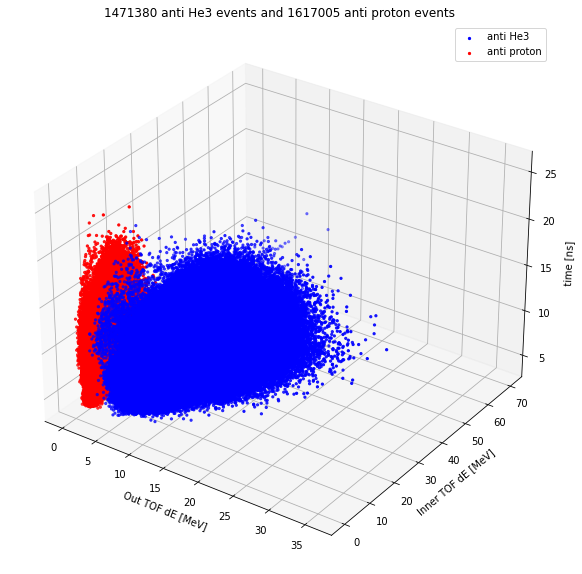

In [7]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.scatter3D(dEOut_He3bar_err, dEIn_He3bar_err, time_He3bar_err, marker = '.', color = 'b', label = 'anti He3')
ax.scatter3D(dEOut_pbar_err, dEIn_pbar_err, time_pbar_err, marker = '.', color = 'r', label = 'anti proton')

ax.set_xlabel("Out TOF dE [MeV]")
ax.set_ylabel('Inner TOF dE [MeV]')
ax.set_zlabel('time [ns]')
ax.view_init(30, -55)
plt.legend()
plt.title("%d anti He3 events and %d anti proton events"%(len(anti_He3[:, 2]), len(anti_proton[:, 2])))

plt.savefig("./TOF3D.jpg")
plt.show()


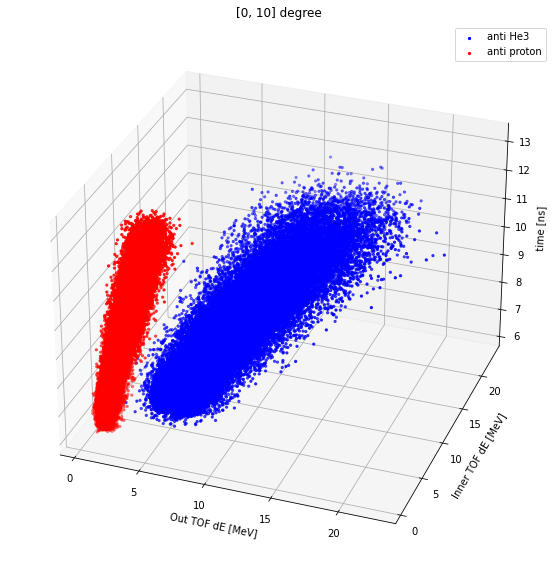

In [8]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.scatter3D(dEOut_He3bar_err[np.logical_and(anti_He3[:, 4]>0, anti_He3[:, 4]< 0.174533)], dEIn_He3bar_err[np.logical_and(anti_He3[:, 4]>0, anti_He3[:, 4]< 0.174533)], time_He3bar_err[np.logical_and(anti_He3[:, 4]>0, anti_He3[:, 4]< 0.174533)], marker = '.', color = 'b', label = 'anti He3')
ax.scatter3D(dEOut_pbar_err[np.logical_and(anti_proton[:, 4]>0, anti_proton[:, 4]< 0.174533)], dEIn_pbar_err[np.logical_and(anti_proton[:, 4]>0, anti_proton[:, 4]< 0.174533)], time_pbar_err[np.logical_and(anti_proton[:, 4]>0, anti_proton[:, 4]< 0.174533)], marker = '.', color = 'r', label = 'anti proton')

ax.set_xlabel("Out TOF dE [MeV]")
ax.set_ylabel('Inner TOF dE [MeV]')
ax.set_zlabel('time [ns]')
ax.view_init(30, -70)
plt.legend()
#plt.title("%d anti He3 events and %d anti proton events"%(len(anti_He3[:, 2]), len(anti_proton[:, 2])))
plt.title("[0, 10] degree")
plt.savefig("./TOF3D.jpg")
plt.show()


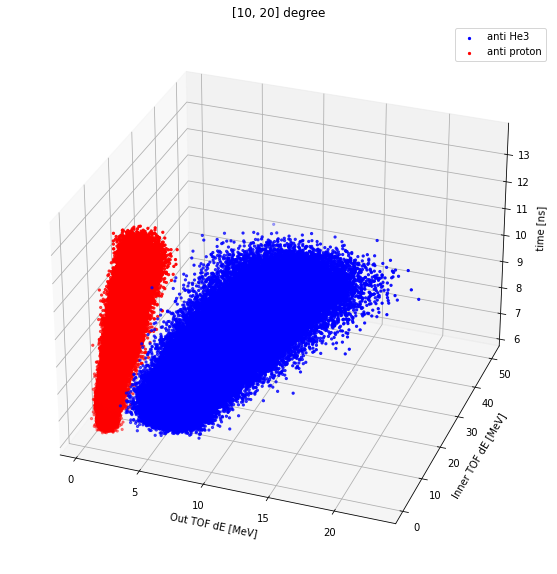

In [17]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.scatter3D(dEOut_He3bar_err[np.logical_and(anti_He3[:, 4]>0.174533, anti_He3[:, 4]< 0.174533*2)], dEIn_He3bar_err[np.logical_and(anti_He3[:, 4]>0.174533, anti_He3[:, 4]< 0.174533*2)], time_He3bar_err[np.logical_and(anti_He3[:, 4]>0.174533, anti_He3[:, 4]< 0.174533*2)], marker = '.', color = 'b', label = 'anti He3')
ax.scatter3D(dEOut_pbar_err[np.logical_and(anti_proton[:, 4]>0.174533, anti_proton[:, 4]< 0.174533*2)], dEIn_pbar_err[np.logical_and(anti_proton[:, 4]>0.174533, anti_proton[:, 4]< 0.174533*2)], time_pbar_err[np.logical_and(anti_proton[:, 4]>0.174533, anti_proton[:, 4]< 0.174533*2)], marker = '.', color = 'r', label = 'anti proton')

ax.set_xlabel("Out TOF dE [MeV]")
ax.set_ylabel('Inner TOF dE [MeV]')
ax.set_zlabel('time [ns]')
ax.view_init(30, -70)
plt.legend()
plt.title("[10, 20] degree")
#plt.title("%d anti He3 events and %d anti proton events"%(len(anti_He3[:, 2]), len(anti_proton[:, 2])))
plt.savefig("./TOF3D.jpg")
plt.show()


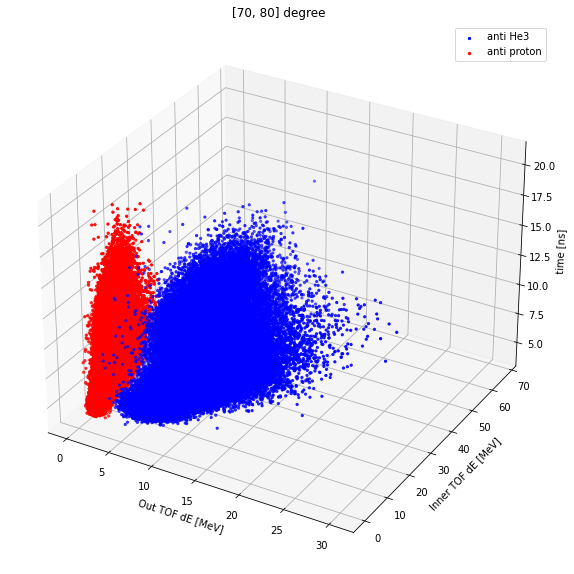

In [18]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.scatter3D(dEOut_He3bar_err[np.logical_and(anti_He3[:, 4]>0.174533*7, anti_He3[:, 4]< 0.174533*8)], dEIn_He3bar_err[np.logical_and(anti_He3[:, 4]>0.174533*7, anti_He3[:, 4]< 0.174533*8)], time_He3bar_err[np.logical_and(anti_He3[:, 4]>0.174533*7, anti_He3[:, 4]< 0.174533*8)], marker = '.', color = 'b', label = 'anti He3')
ax.scatter3D(dEOut_pbar_err[np.logical_and(anti_proton[:, 4]>0.174533*7, anti_proton[:, 4]< 0.174533*8)], dEIn_pbar_err[np.logical_and(anti_proton[:, 4]>0.174533*7, anti_proton[:, 4]< 0.174533*8)], time_pbar_err[np.logical_and(anti_proton[:, 4]>0.174533*7, anti_proton[:, 4]< 0.174533*8)], marker = '.', color = 'r', label = 'anti proton')

ax.set_xlabel("Out TOF dE [MeV]")
ax.set_ylabel('Inner TOF dE [MeV]')
ax.set_zlabel('time [ns]')
ax.view_init(30, -60)
plt.legend()
plt.title("[70, 80] degree")
#plt.title("%d anti He3 events and %d anti proton events"%(len(anti_He3[:, 2]), len(anti_proton[:, 2])))
plt.savefig("./TOF3D.jpg")
plt.show()


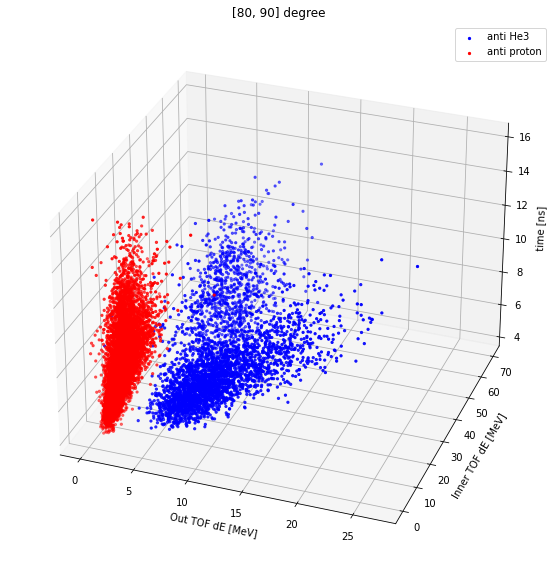

In [11]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.scatter3D(dEOut_He3bar_err[np.logical_and(anti_He3[:, 4]>0.174533*8, anti_He3[:, 4]< 0.174533*9)], dEIn_He3bar_err[np.logical_and(anti_He3[:, 4]>0.174533*8, anti_He3[:, 4]< 0.174533*9)], time_He3bar_err[np.logical_and(anti_He3[:, 4]>0.174533*8, anti_He3[:, 4]< 0.174533*9)], marker = '.', color = 'b', label = 'anti He3')
ax.scatter3D(dEOut_pbar_err[np.logical_and(anti_proton[:, 4]>0.174533*8, anti_proton[:, 4]< 0.174533*9)], dEIn_pbar_err[np.logical_and(anti_proton[:, 4]>0.174533*8, anti_proton[:, 4]< 0.174533*9)], time_pbar_err[np.logical_and(anti_proton[:, 4]>0.174533*8, anti_proton[:, 4]< 0.174533*9)], marker = '.', color = 'r', label = 'anti proton')

ax.set_xlabel("Out TOF dE [MeV]")
ax.set_ylabel('Inner TOF dE [MeV]')
ax.set_zlabel('time [ns]')
ax.view_init(30, -70)
plt.legend()
plt.title("[80, 90] degree")
#plt.title("%d anti He3 events and %d anti proton events"%(len(anti_He3[:, 2]), len(anti_proton[:, 2])))
plt.savefig("./TOF3D.jpg")
plt.show()


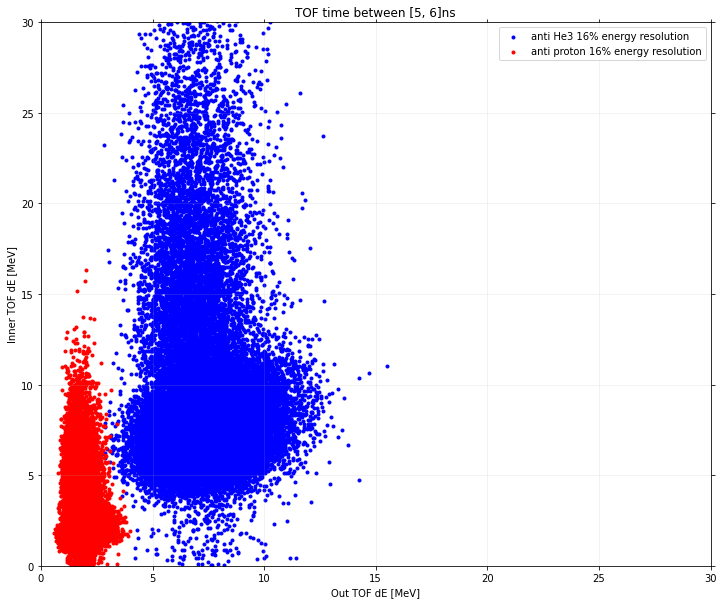

43758


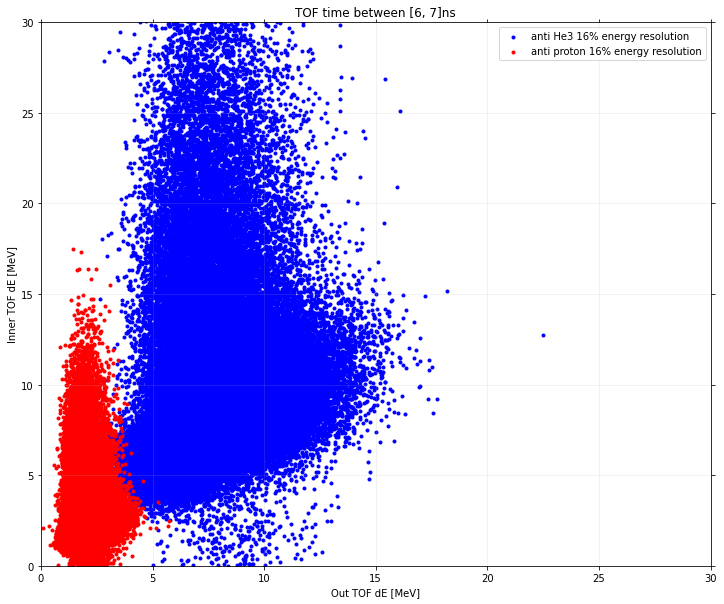

87260


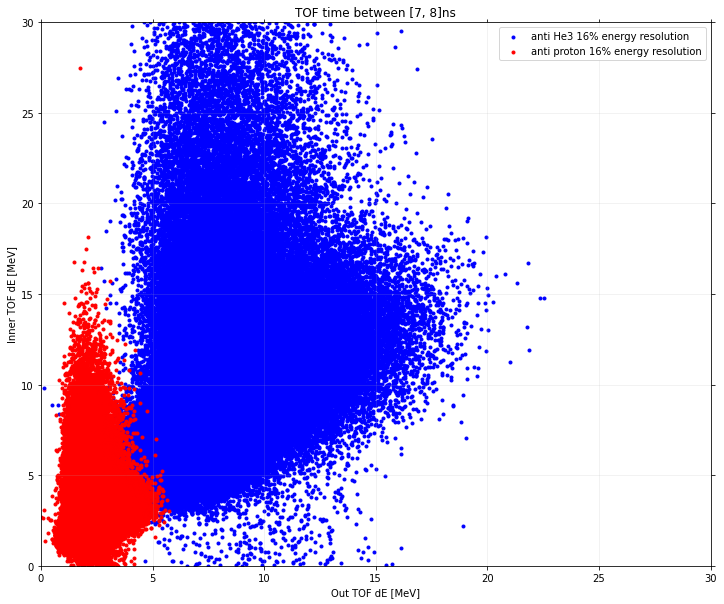

192983


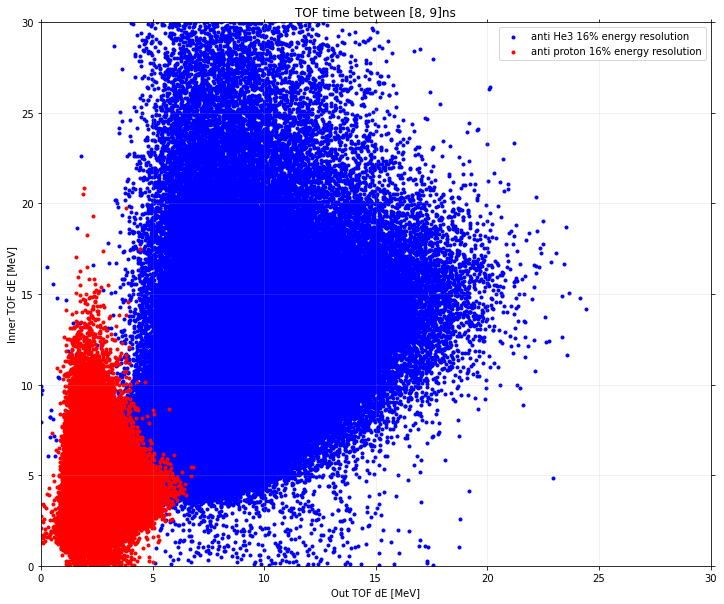

248012


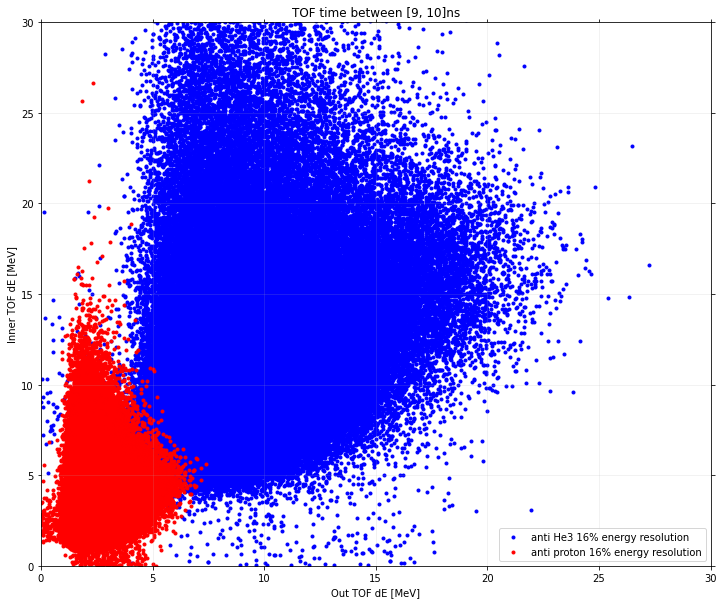

257088


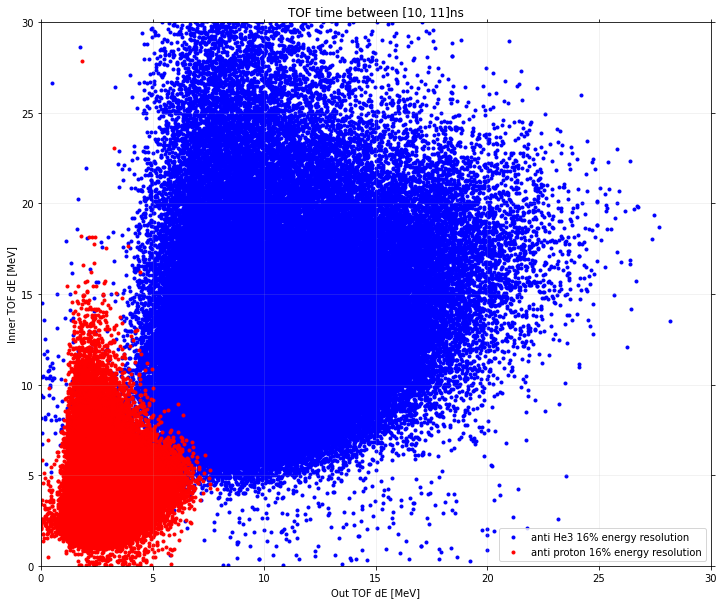

223871


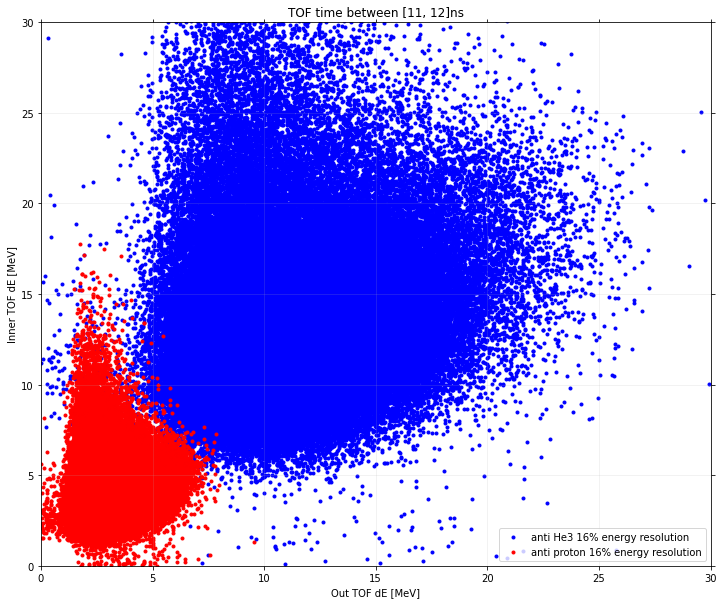

171611


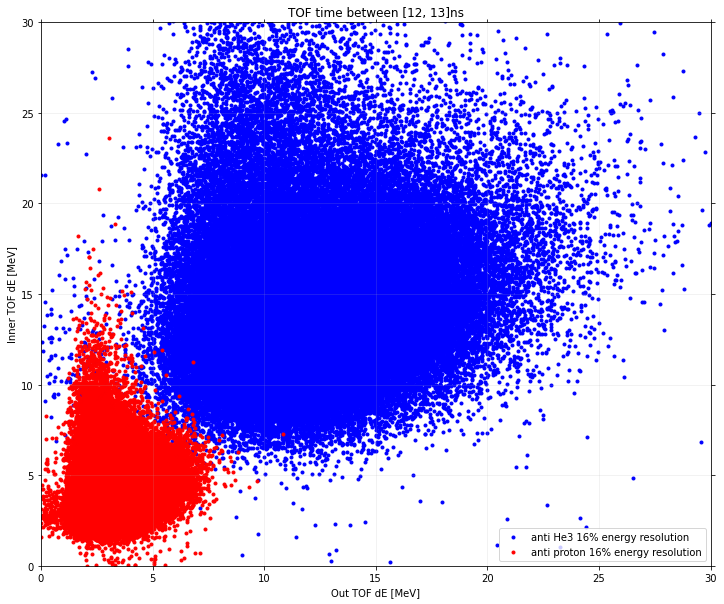

111438


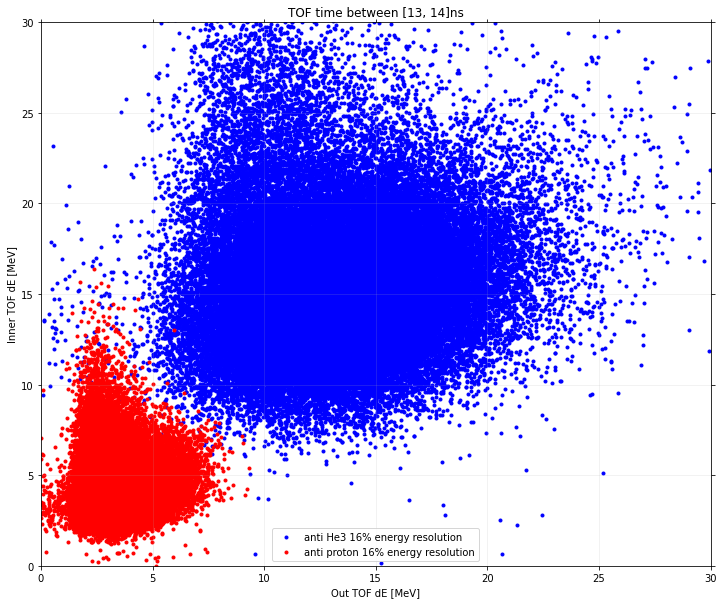

63968


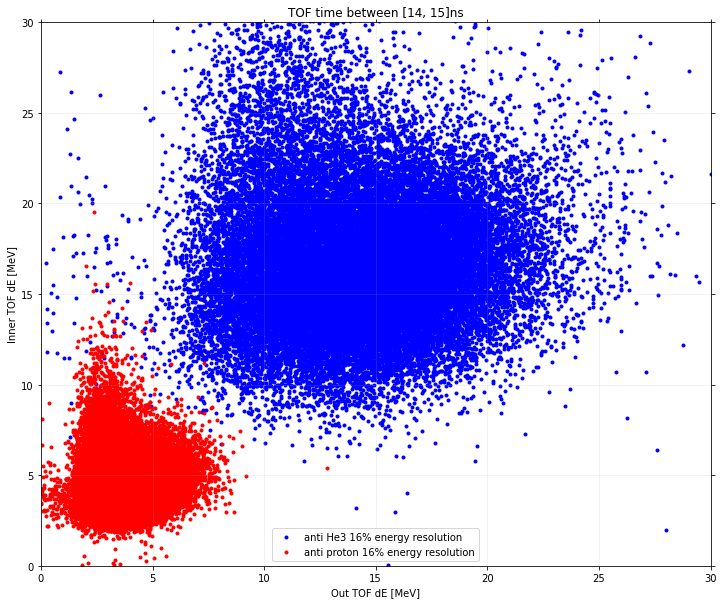

34443


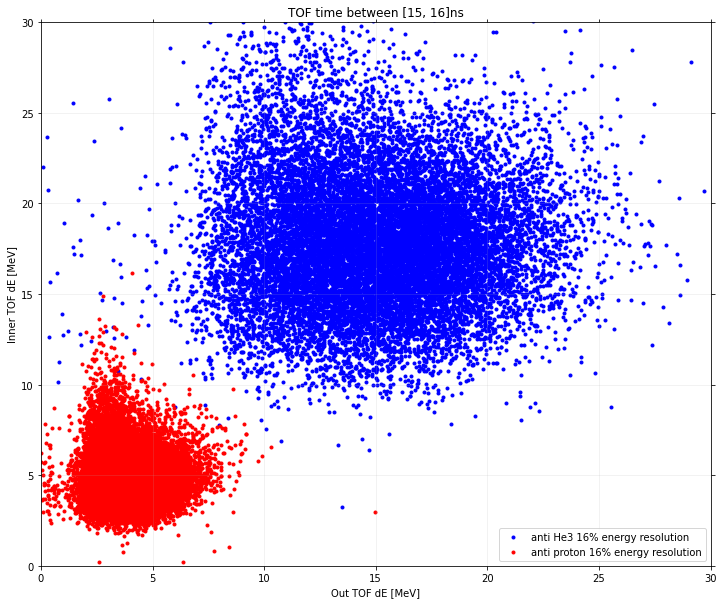

17133


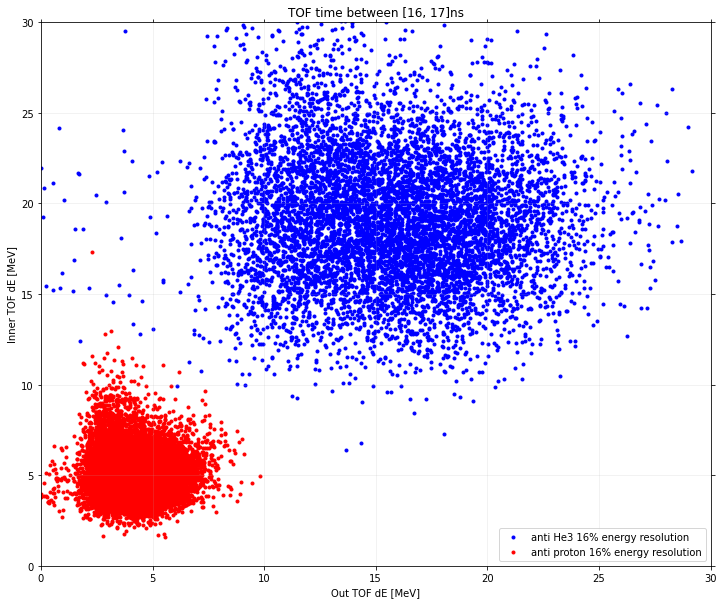

8002


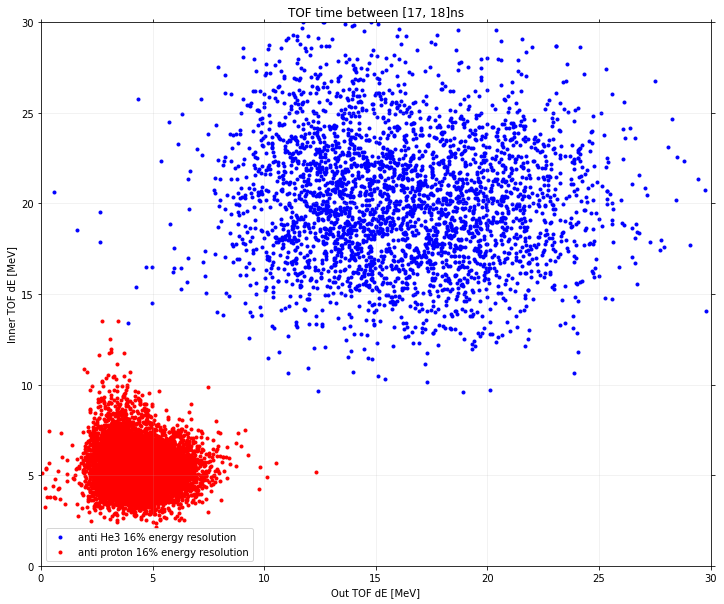

3253


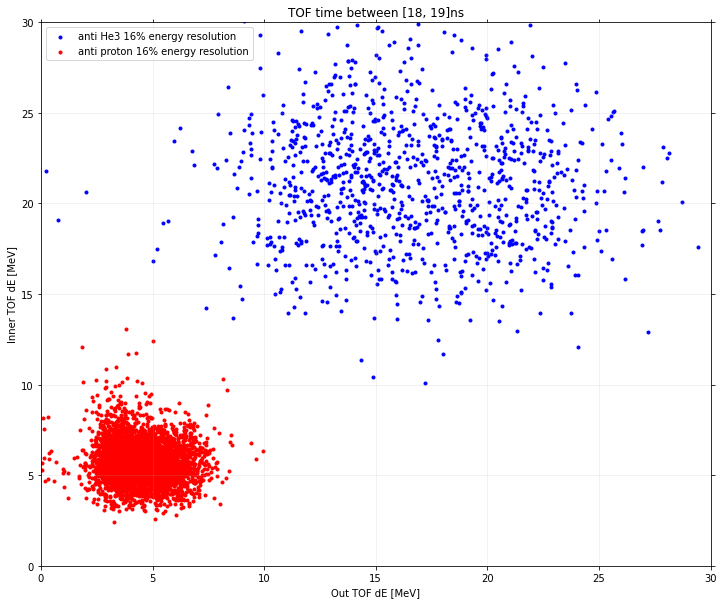

1103


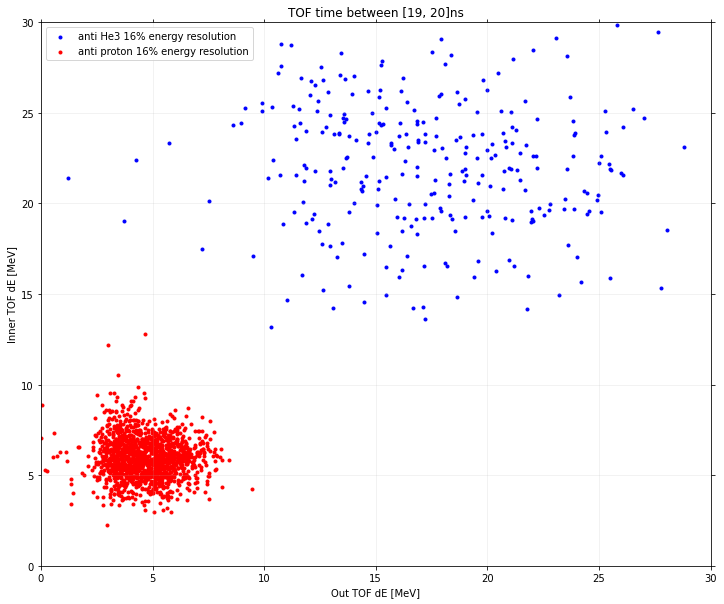

296


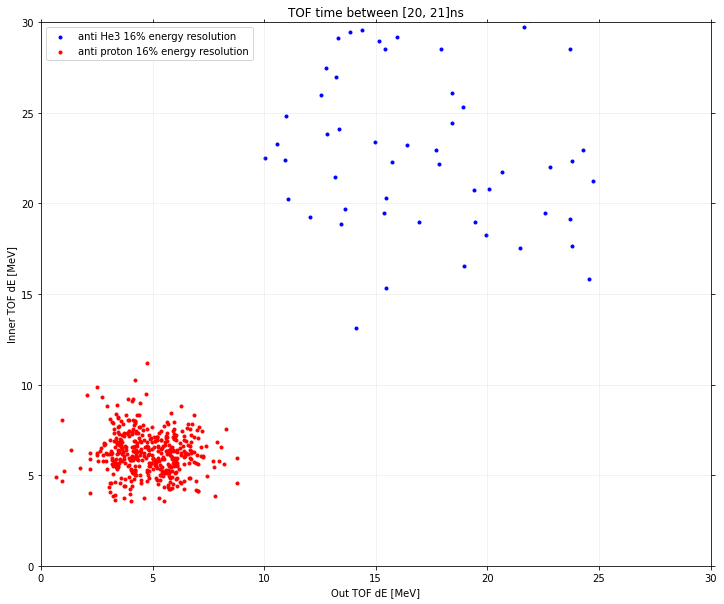

55


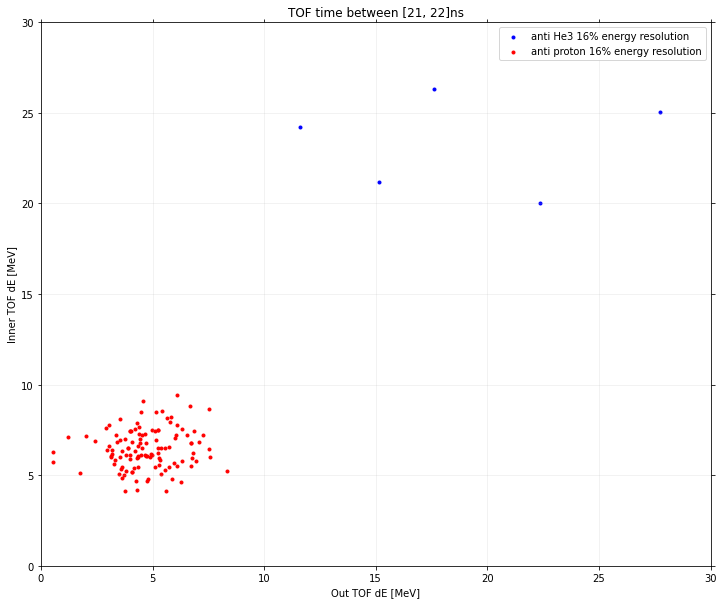

5


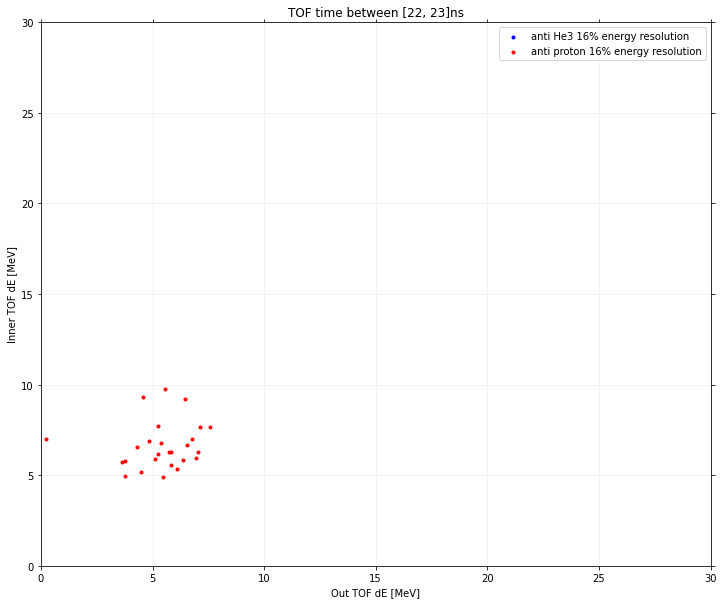

0


In [12]:
start_time = 5
#matplotlib.rcParams.update({'font.size': 30})
for n in range(18):
    fig = plt.figure(figsize=(12,10))
    plt.cla()
    plt.scatter(dEOut_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)], dEIn_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)], label = "anti He3 %d%% energy resolution"%(100*sigma), marker = '.', color = 'b')
    plt.scatter(dEOut_pbar_err[np.logical_and(time_pbar_err > start_time+n, time_pbar_err < start_time + 1 +n)] , dEIn_pbar_err[np.logical_and(time_pbar_err >start_time+n, time_pbar_err <start_time + 1 +n)], label = "anti proton %d%% energy resolution"%(100*sigma), marker = '.', color = 'r')
    #plt.scatter(dEOut_dbar_err[np.logical_and(time_dbar_err>start_time+n, time_dbar_err<start_time + 1 +n)], dEIn_dbar_err[np.logical_and(time_dbar_err>start_time+n, time_dbar_err<start_time + 1 +n)], label = "anti deuteron 45 degree", marker = '.', color = 'lightcoral')
    plt.grid(alpha = 0.2)
    plt.legend()
    plt.title("TOF time between [{}".format(start_time+n)+", {}".format(start_time + 1 +n)+"]ns")
    plt.xlabel('Out TOF dE [MeV]')
    plt.ylabel('Inner TOF dE [MeV]')
    plt.xlim([0, 30])
    plt.ylim([0, 30])
    plt.show()
    print(len(dEOut_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)]))
    time.sleep(0.001)

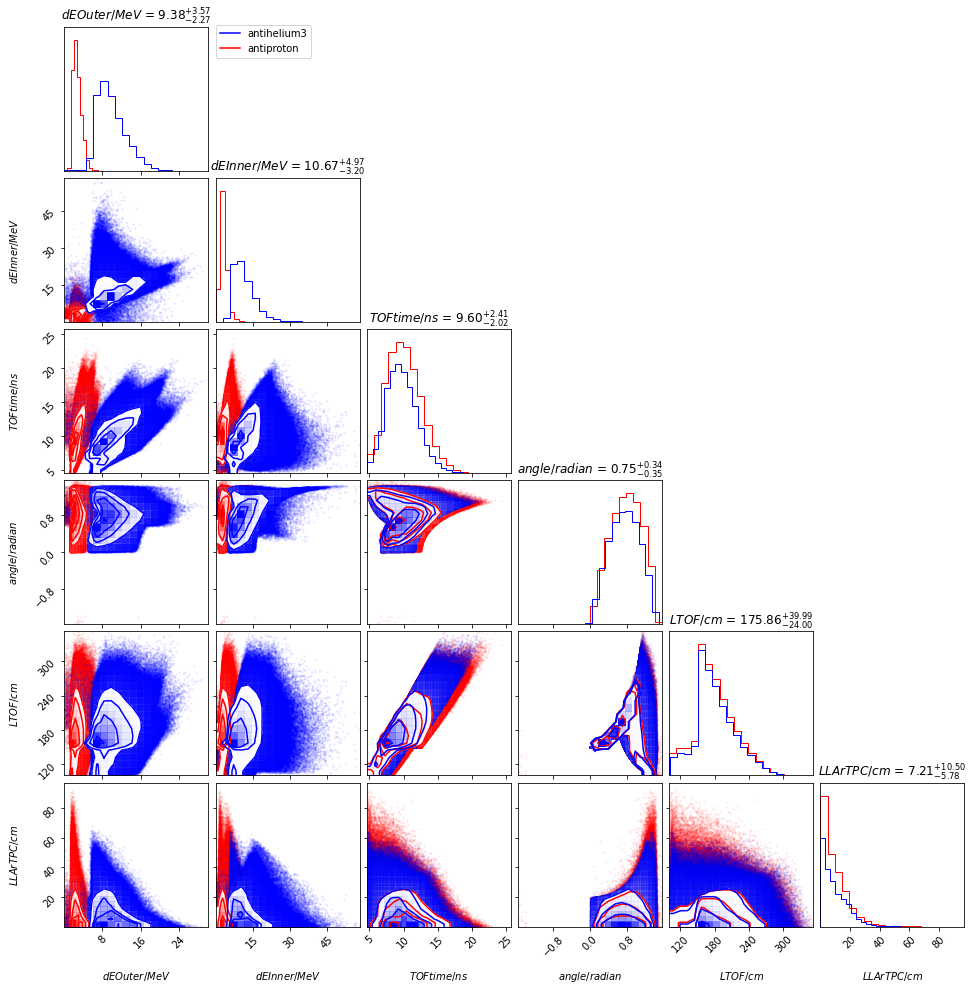

In [13]:
"""
Make corner plot
"""

import corner
from arviz import from_dict
temp = np.random.randn(2, 2000)

#[0]Event number/[1]energy deposit on the outer TOF/[2]energy deposit on the inner TOF/[3]time in between TOF/[4]angle in between TOF/[5]distance in between TOF/[6]distance travel inside LArTPC/[7]penetration depth on z/[8]distance on the side/[9]initial energy/[10]event type/[11]Outer TOF paddle/[12]Inner TOF paddle

corner_anti_proton = from_dict(
    posterior={
        "dE on the outer TOF": anti_proton[:, 1],
        "dE on the inner TOF": anti_proton[:, 2],
        "time in between TOF": anti_proton[:, 3],
        "angle in between TOF": anti_proton[:, 4],
        "distance in between TOF": anti_proton[:, 5],
        "distance travel inside LArTPC": anti_proton[:, 6]
    },
)

corner_anti_He3 = from_dict(
    posterior={
        "dE outer TOF/MeV": anti_He3[:, 1],
        "dE inner TOF/MeV": anti_He3[:, 2],
        "time TOF/ns": anti_He3[:, 3],
        "angle TOF/radian": anti_He3[:, 4],
        "distance TOF/cm": anti_He3[:, 5],
        "distance LArTPC/cm": anti_He3[:, 6]
    },
)

import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='blue', label='antihelium3')
red_line = mlines.Line2D([], [], color='red', label='antiproton')
#labels=[r"$dE Outer$", r"$dE Inner$", r"$TOF time$", r"$angle$", r"$L TOF$", r"$L LArTPC$", r"$initialE$"]
#range=[(0, 30), (0, 30), (4, 25), (0, 1.6), (100, 350), (0, 80)],
figure1 = corner.corner(corner_anti_proton, color='r')
figure2 = corner.corner(corner_anti_He3, divergences=True, color='b', labels=["$dE Outer/MeV$", "$dE Inner/MeV$", "$TOF time/ns$", "$angle/radian$", "$L TOF/cm$", "$L LArTPC/cm$"], show_titles=True, title_kwargs={"fontsize": 12}, fig=figure1)
plt.legend(handles=[blue_line,red_line], bbox_to_anchor=(-4.5, 6.0, 1., 5.0), loc=4)

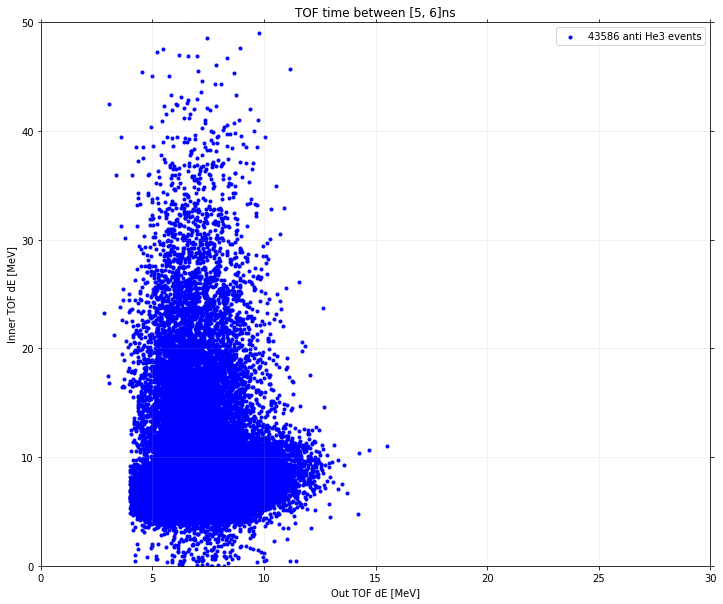

Outer TOF cut:3.98762465042229
Inner TOF cut:16.313460876296816
antiproton number:50425
antiHe3 number:43758
cut efficiency:0.996046527571471


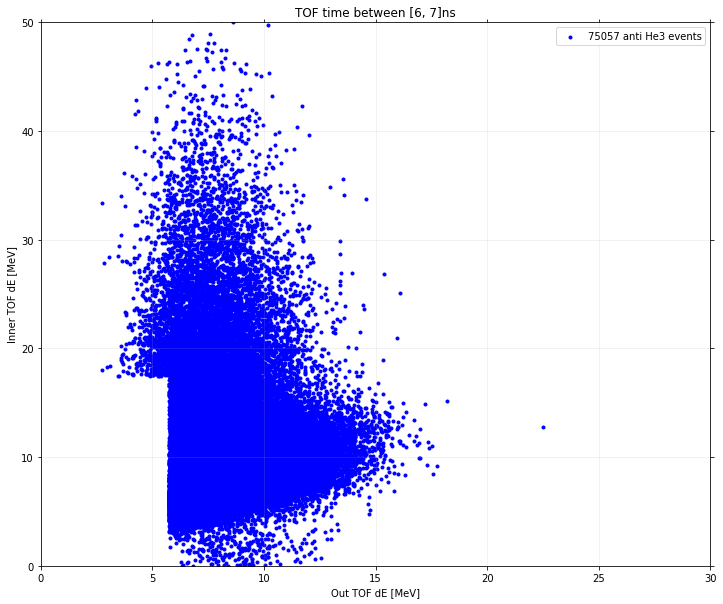

Outer TOF cut:5.749579518461456
Inner TOF cut:17.47428362913675
antiproton number:94443
antiHe3 number:87260
cut efficiency:0.8601437068106027


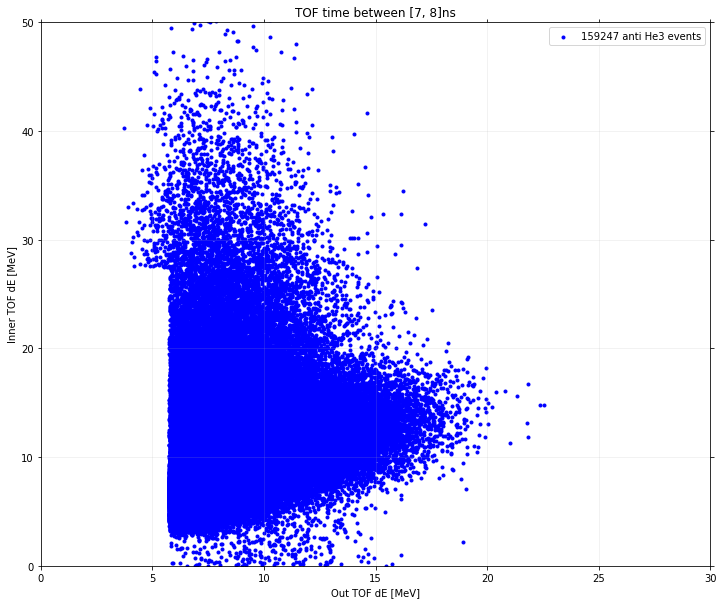

Outer TOF cut:5.757056735909424
Inner TOF cut:27.45335359384915
antiproton number:189842
antiHe3 number:192983
cut efficiency:0.8251823985408117


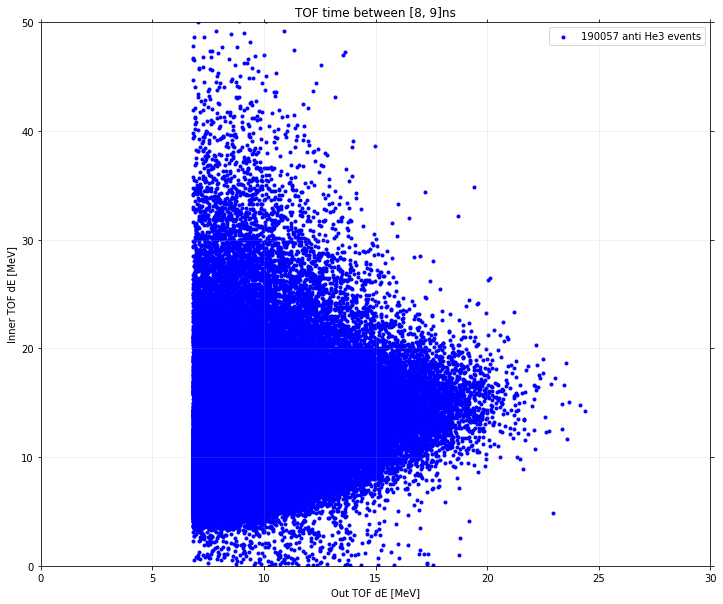

Outer TOF cut:6.809151324559872
Inner TOF cut:54.58700860668655
antiproton number:232313
antiHe3 number:248012
cut efficiency:0.7663187010358328


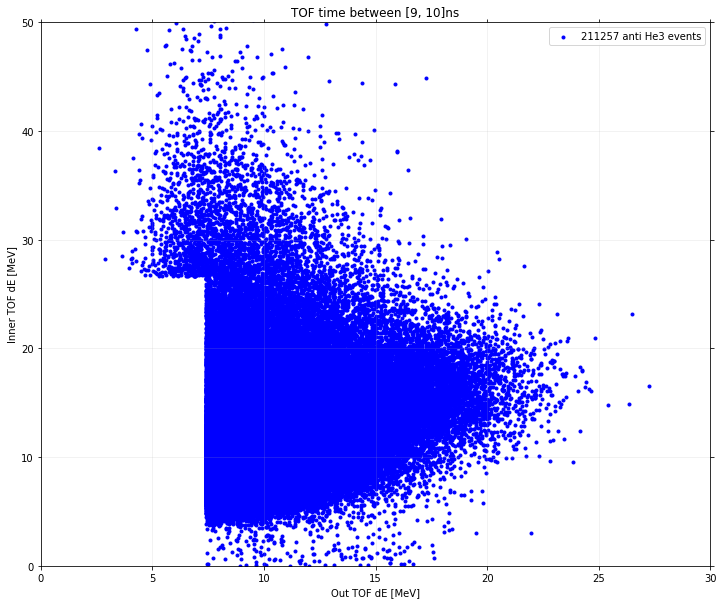

Outer TOF cut:7.380794935281005
Inner TOF cut:26.646596660278004
antiproton number:247849
antiHe3 number:257088
cut efficiency:0.8217271061772382


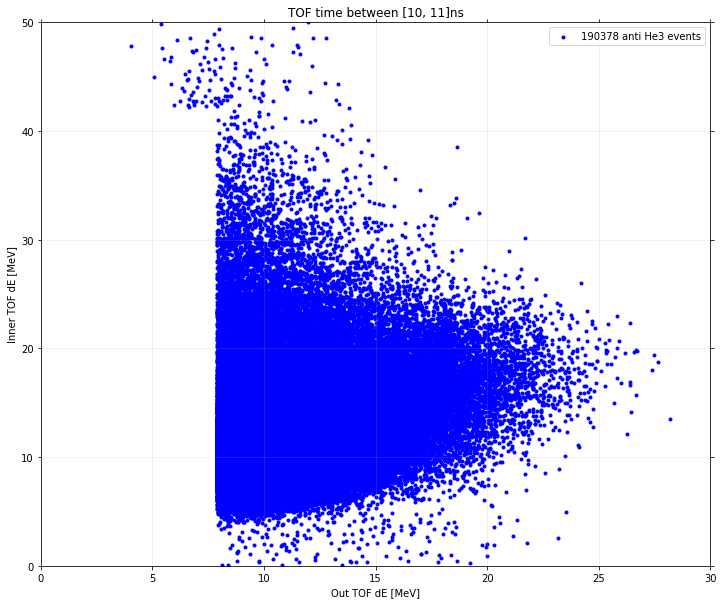

Outer TOF cut:7.885756619346944
Inner TOF cut:42.03537024941507
antiproton number:235283
antiHe3 number:223871
cut efficiency:0.8503877215551744


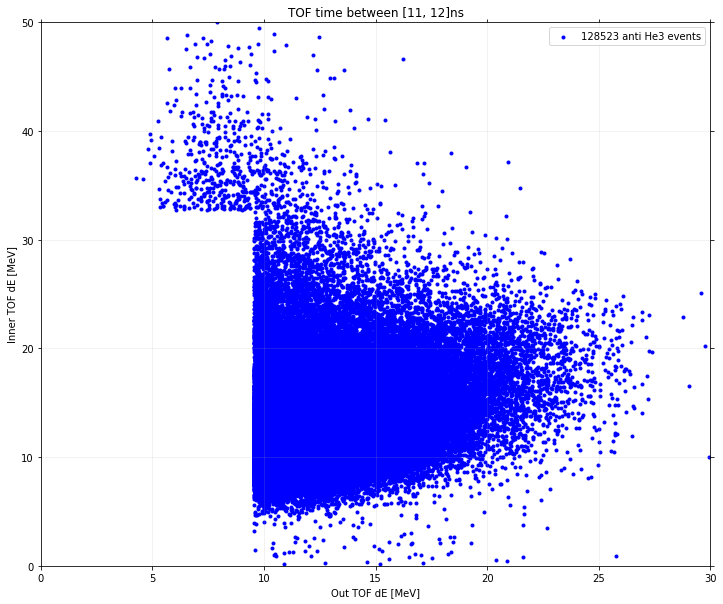

Outer TOF cut:9.532421322092326
Inner TOF cut:32.71934523365296
antiproton number:194978
antiHe3 number:171611
cut efficiency:0.7489161597091113


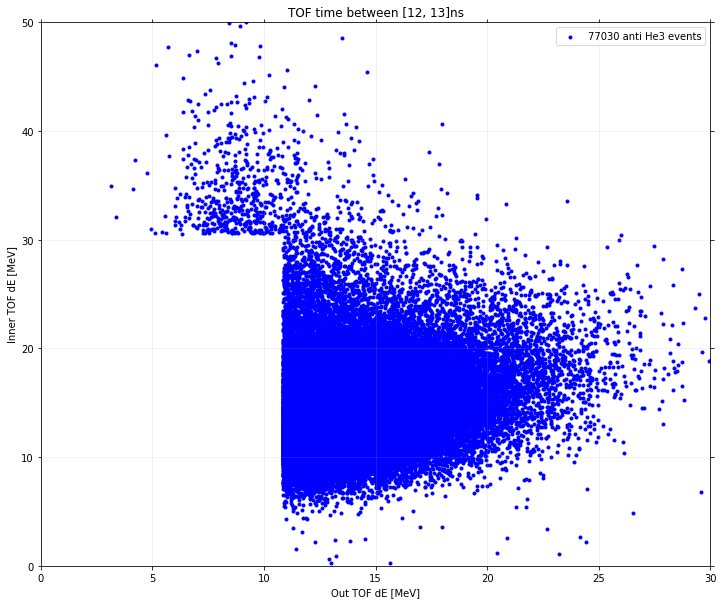

Outer TOF cut:10.842621537778516
Inner TOF cut:30.540865152663898
antiproton number:147186
antiHe3 number:111438
cut efficiency:0.6912301797395884


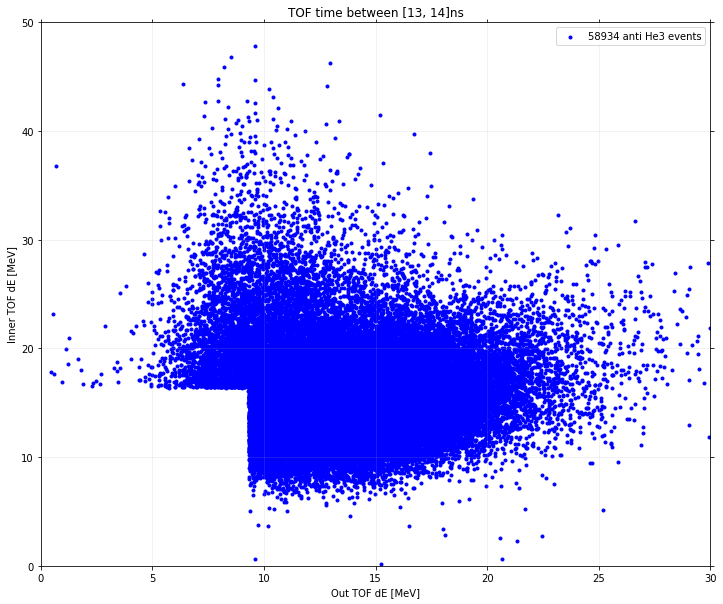

Outer TOF cut:9.303924069598992
Inner TOF cut:16.386713003649625
antiproton number:95060
antiHe3 number:63968
cut efficiency:0.9212899998436743


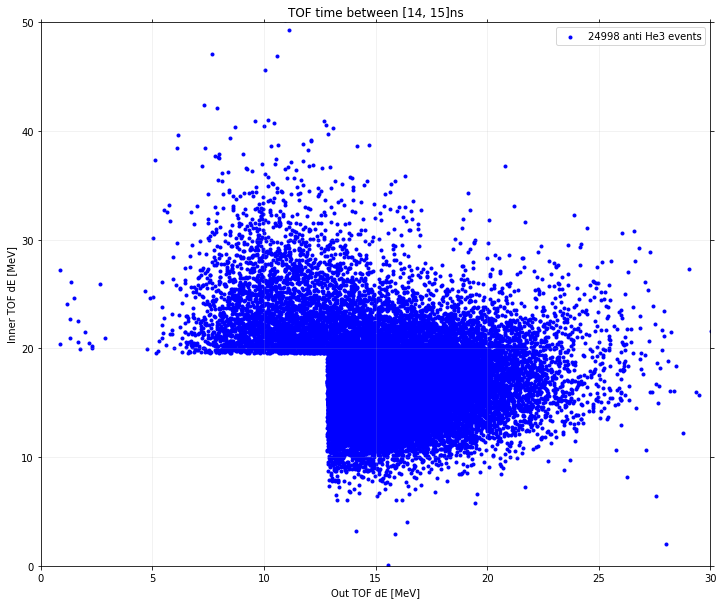

Outer TOF cut:12.836972111876156
Inner TOF cut:19.551575181375718
antiproton number:56735
antiHe3 number:34443
cut efficiency:0.7257577517129253


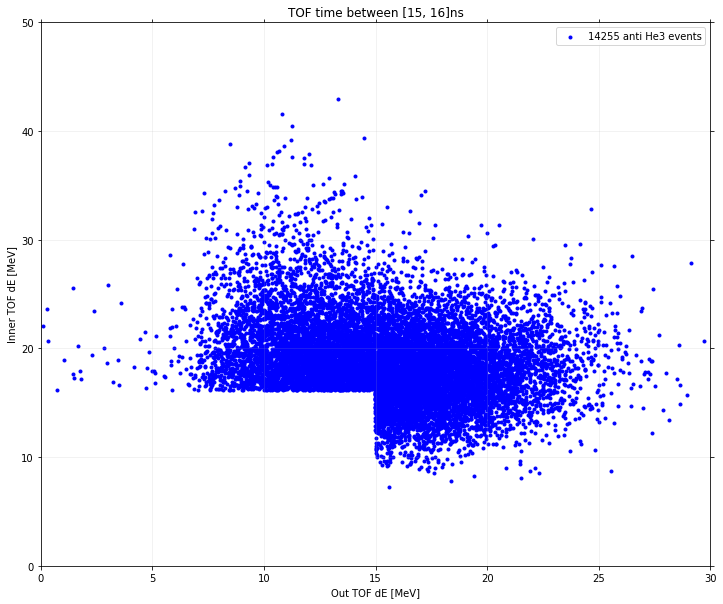

Outer TOF cut:14.96150942264347
Inner TOF cut:16.14389651976501
antiproton number:32051
antiHe3 number:17133
cut efficiency:0.8319715186179526


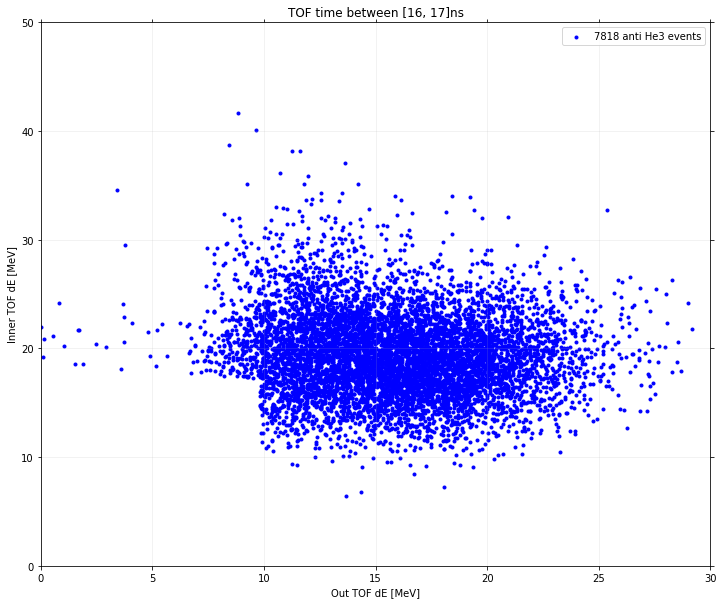

Outer TOF cut:9.820639917758244
Inner TOF cut:17.29611740018863
antiproton number:17273
antiHe3 number:8002
cut efficiency:0.9768836686242659


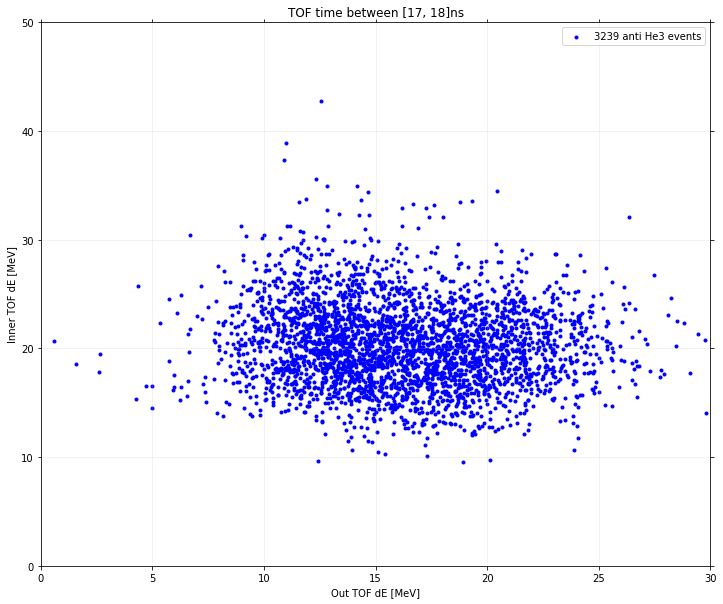

Outer TOF cut:12.309696367894425
Inner TOF cut:13.509075691455218
antiproton number:8525
antiHe3 number:3253
cut efficiency:0.9953902888752305


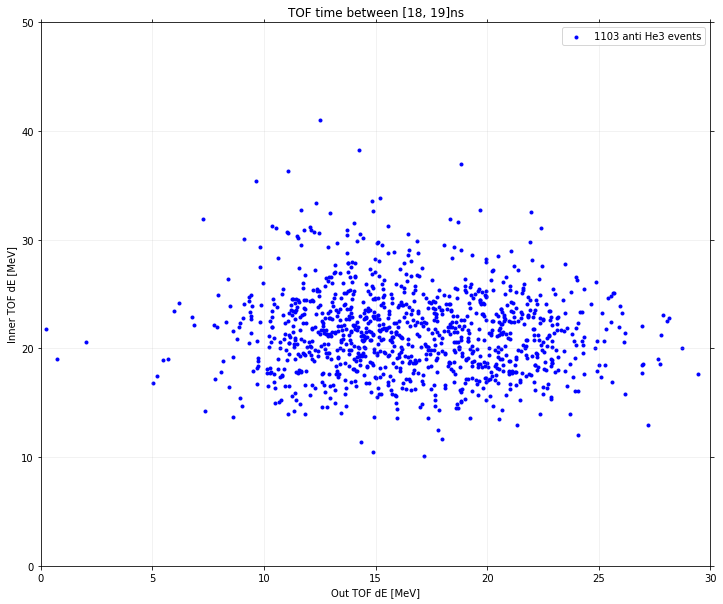

Outer TOF cut:9.940994832098957
Inner TOF cut:13.067445856731146
antiproton number:3803
antiHe3 number:1103
cut efficiency:0.9990942028985508


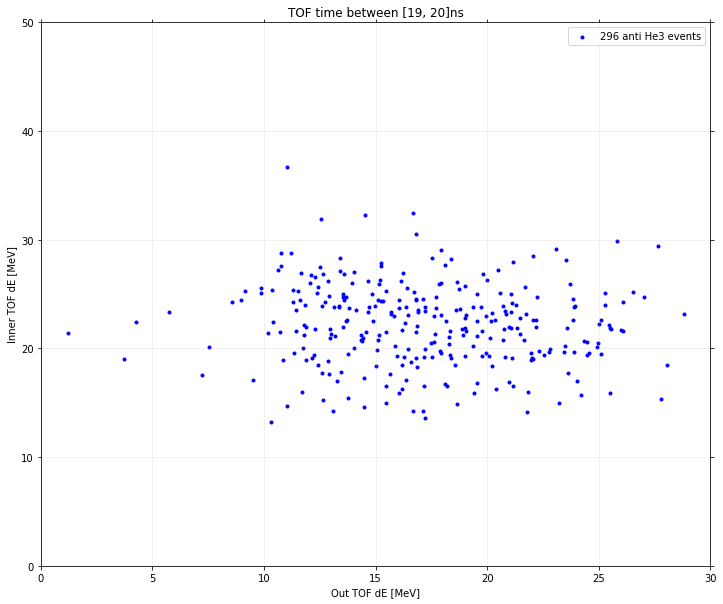

Outer TOF cut:9.46831491213499
Inner TOF cut:12.797465695036212
antiproton number:1501
antiHe3 number:296
cut efficiency:0.9966329966329966


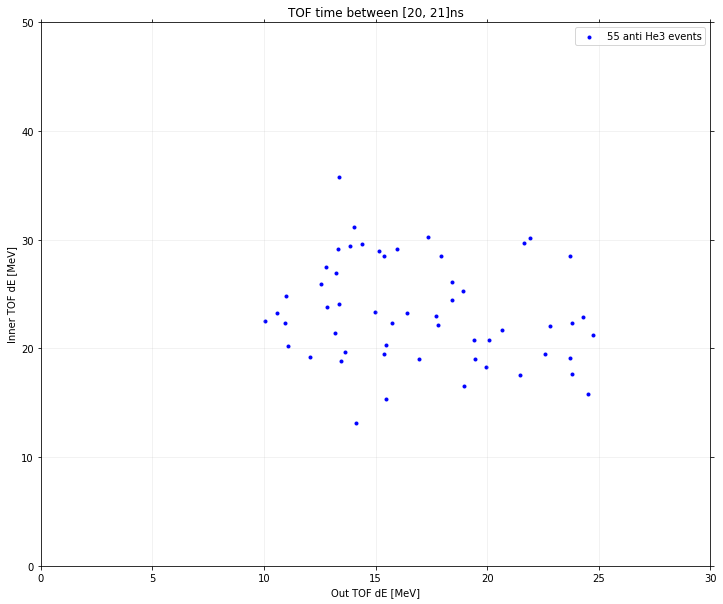

Outer TOF cut:8.788530073715616
Inner TOF cut:11.21294329718915
antiproton number:440
antiHe3 number:55
cut efficiency:0.9821428571428571


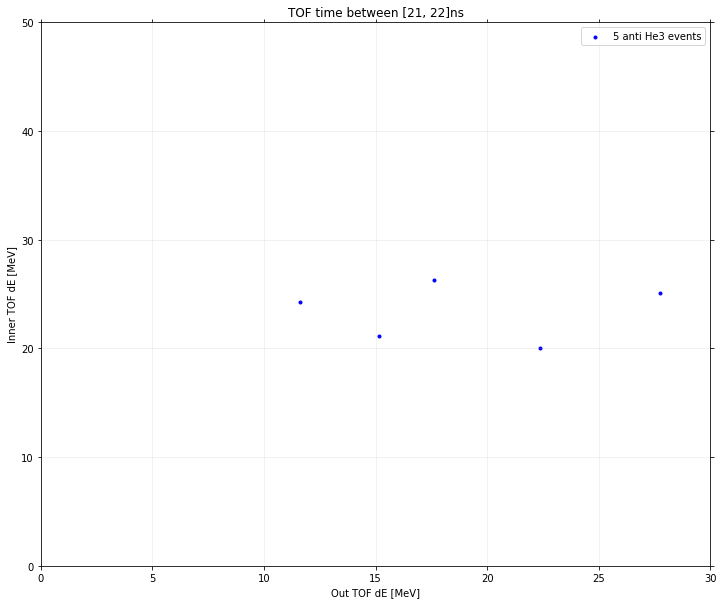

Outer TOF cut:8.32440003514773
Inner TOF cut:9.417083630225179
antiproton number:119
antiHe3 number:5
cut efficiency:0.8333333333333334


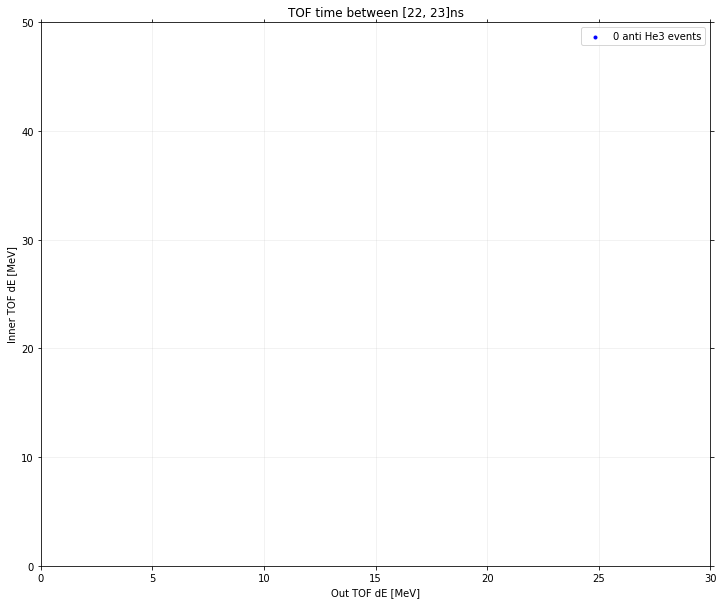

Outer TOF cut:7.5904327822588105
Inner TOF cut:9.78323892013789
antiproton number:26
antiHe3 number:0
cut efficiency:0.0
Finished!
 1185838 anti He3 events been kept
Average cut efficiency = 80%


In [14]:
start_time = 5
low_limit = 10
high_limit = 11
events_kept = 0

#matplotlib.rcParams.update({'font.size': 30})
for n in range(18):
    fig = plt.figure(figsize=(12,10))
    N_x = []
    N_y = []
    He3bar_cut_x = []
    He3bar_cut_y = []
    plt.cla()
    cut_min_x = np.max(dEOut_pbar_err[np.logical_and(time_pbar_err>start_time+n, time_pbar_err<start_time+n+1)]) 
    cut_min_y = np.max(dEIn_pbar_err[np.logical_and(time_pbar_err>start_time+n, time_pbar_err<start_time+n+1)])
    He3bar_cut_x = dEOut_He3bar_err[np.logical_and(time_He3bar_err>start_time+n, time_He3bar_err<start_time+n+1)]
    He3bar_cut_y = dEIn_He3bar_err[np.logical_and(time_He3bar_err>start_time+n, time_He3bar_err<start_time+n+1)]
    N_x = He3bar_cut_x[np.logical_not(np.logical_and(He3bar_cut_x<cut_min_x, He3bar_cut_y<cut_min_y))]
    N_y = He3bar_cut_y[np.logical_not(np.logical_and(He3bar_cut_x<cut_min_x, He3bar_cut_y<cut_min_y))]
    plt.scatter(N_x, N_y, marker = '.', color = 'b', label = '%d anti He3 events'%len(N_y))
    plt.grid(alpha = 0.2)
    plt.xlabel('Out TOF dE [MeV]')
    plt.ylabel('Inner TOF dE [MeV]')
    plt.title("TOF time between [{}".format(start_time+n)+", {}".format(start_time + 1 +n)+"]ns")
    plt.legend()
    plt.xlim([0, 30])
    plt.ylim([0, 50])
    plt.show()
    events_kept = events_kept + len(N_y)
    print("Outer TOF cut:"+str(cut_min_x))
    print("Inner TOF cut:"+str(cut_min_y))
    print("antiproton number:"+str(len(dEOut_pbar_err[np.logical_and(time_pbar_err >start_time+n, time_pbar_err <start_time + 1 +n)])))
    print("antiHe3 number:"+str(len(dEOut_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)])))
    print("cut efficiency:"+str(len(N_x)/(len(He3bar_cut_x)+1)))
    
print("Finished!\n %d anti He3 events been kept"%events_kept)
print("Average cut efficiency = %d%%"%(100*events_kept/len(anti_He3[:, 2])))